#### What is the Naive Bayes Algorithm?
Naive Bayes is a probabilistic classifier based on Bayes' theorem, which uses the assumption of feature independence given the class. It’s called “naive” because it assumes that all features are equally important and independent, which is rarely true in real-world data. Despite this simplification, Naive Bayes works well in many practical applications, especially in text classification (e.g., spam detection) and recommendation systems.

- Formula: For a given feature vector $X = (x_1, x_2, \dots, x_n)$, the probability of class $C$ given $X$ is: $P(C|X) = \frac{P(C) \prod_{i=1}^{n} P(x_i|C)}{P(X)}$ 

​
 
The algorithm then predicts the class with the highest posterior probability.

####  Generate Random Data and Plot It
We can generate random data for two classes (e.g., "Class A" and "Class B") to demonstrate a Naive Bayes problem. Here’s an example:

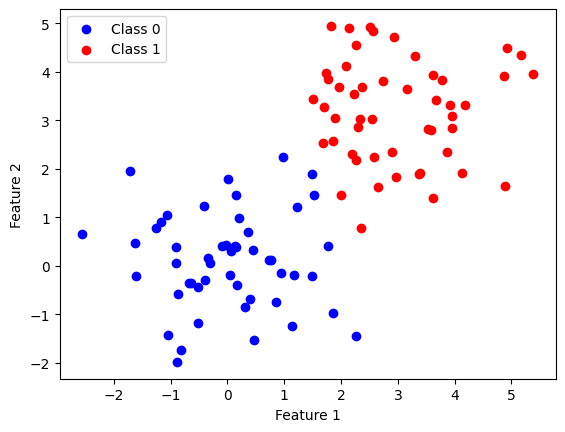

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two classes
np.random.seed(0)
class_0 = np.random.normal(0, 1, (50, 2))  # Class 0
class_1 = np.random.normal(3, 1, (50, 2))  # Class 1

# Labels
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(50), np.ones(50)))

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='Class 0')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Is Naive Bayes Good for Regression or Classification?
Naive Bayes is primarily used for classification tasks. It is not suitable for regression because it predicts probabilities for classes rather than continuous values.

#### Implement Naive Bayes from Scratch Using NumPy
Here’s a simple Naive Bayes implementation that assumes Gaussian-distributed features for each class.

In [3]:
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.var[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def _gaussian_pdf(self, x, mean, var):
        eps = 1e-6  # for numerical stability
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(- (x - mean) ** 2 / (2 * var + eps))
        return coeff * exponent

    def predict(self, X):
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)

    def _predict_single(self, x):
        posteriors = {}
        for cls in self.classes:
            prior = np.log(self.priors[cls])
            posterior = np.sum(np.log(self._gaussian_pdf(x, self.mean[cls], self.var[cls])))
            posteriors[cls] = prior + posterior
        return max(posteriors, key=posteriors.get)


#### When to Use Naive Bayes and When Not to Use It
- Use When:

    - Text classification tasks (e.g., spam detection, sentiment analysis).
    - High-dimensional data with many features (e.g., word frequencies in documents).
    - When feature independence holds reasonably well or doesn’t drastically impact the model.
- Avoid When:

    - Features are heavily correlated, as the independence assumption will be violated.
    - Continuous data without a clear probabilistic distribution.

#### What is the Loss Function?
Naive Bayes doesn’t have a traditional loss function like neural networks do, as it’s derived from probability principles. Instead, it maximizes the posterior probability of the data. In implementations, it’s common to use log likelihood for numerical stability.

#### How to Optimize the Algorithm
Naive Bayes has fewer parameters to tune than many other algorithms. Optimization typically involves:

- Smoothing: Especially with discrete data, smoothing (e.g., Laplace smoothing) helps avoid zero probabilities for unseen events.
- Feature Selection: Selecting relevant features to reduce dimensionality and prevent noise.
- Hyperparameter tuning: Adjusting the likelihood distribution (Gaussian, Multinomial, etc.) according to the data type.

#### How to Plot Naive Bayes for Visualization
You can visualize the decision boundary created by Naive Bayes on a 2D dataset, typically by plotting the probabilities or the contour lines that separate classes.

Here’s an example:

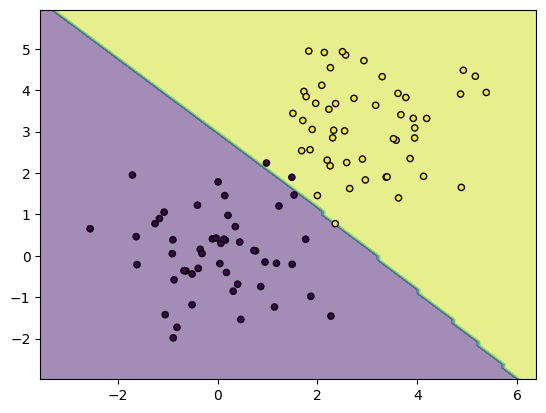

In [4]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.show()

model = NaiveBayes()
model.fit(X, y)
plot_decision_boundary(model, X, y)


### What Else Should I Know About Naive Bayes?
- Extensions: Different types of Naive Bayes (e.g., Gaussian, Multinomial, Bernoulli) are suitable for various data types.
    - Gaussian Naive Bayes: Assumes continuous features are normally distributed. It’s commonly used when features have a Gaussian (bell-curve) distribution, making it suitable for numerical data (e.g., height, weight, income).

    - Multinomial Naive Bayes: Works well for count data, such as word frequencies in text documents. It assumes feature values represent counts, making it a go-to for text classification problems, like spam detection or sentiment analysis.

    - Bernoulli Naive Bayes: Best for binary/Boolean features (values as 0 or 1). It’s ideal for tasks where features are binary (e.g., presence or absence of a word in a document) and is often used for binary text classification, like categorizing emails as spam or not spam.
- Pros and Cons: It’s efficient and interpretable but limited by the independence assumption.
- Speed and Scalability: Naive Bayes is fast, making it suitable for large datasets with high dimensions.